# Image Compression with SVD

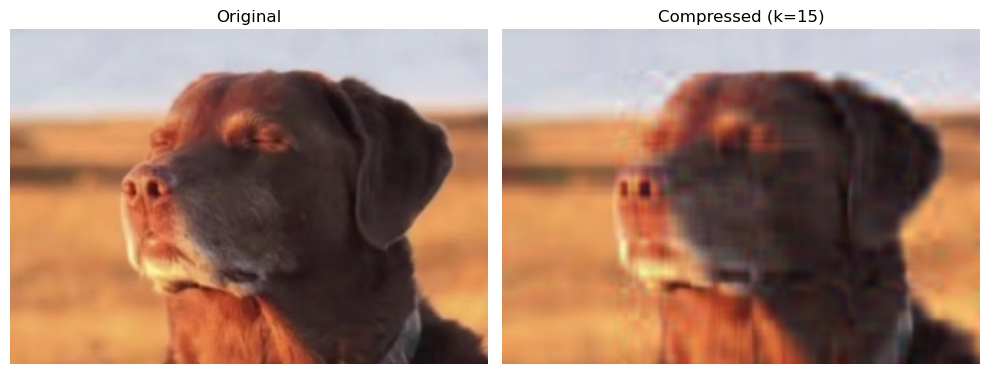

In [7]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def compress_channel(channel: np.ndarray, k: int) -> np.ndarray:
    """
    Compress a single 2D channel using its top-k singular values.
    
    Args:
        channel: 2D array of shape (H, W).
        k: number of singular values/vectors to keep.
        
    Returns:
        Reconstructed 2D channel of shape (H, W).
    """
    # Compute full SVD
    U, S, Vt = np.linalg.svd(channel, full_matrices=False)
    
    # Truncate to top-k
    U_k  = U[:, :k]            # (H, k)
    S_k  = np.diag(S[:k])      # (k, k)
    Vt_k = Vt[:k, :]           # (k, W)
    
    # Reconstruct channel
    return U_k @ S_k @ Vt_k

def compress_image(img_arr: np.ndarray, k: int) -> np.ndarray:
    """
    Compress an image (grayscale or RGB) by applying SVD on each channel.
    
    Args:
        img_arr: Array of shape (H, W) or (H, W, 3), dtype float.
        k: number of singular values per channel.
        
    Returns:
        Compressed image array of same shape, dtype uint8.
    """
    if img_arr.ndim == 2:
        # Grayscale
        comp = compress_channel(img_arr, k)
        return np.clip(comp, 0, 255).astype(np.uint8)
    
    # Color image: process each channel independently
    channels = []
    for c in range(img_arr.shape[2]):
        comp_c = compress_channel(img_arr[:, :, c], k)
        channels.append(comp_c)
    comp_img = np.stack(channels, axis=2)
    return np.clip(comp_img, 0, 255).astype(np.uint8)

image_path = "example.jpg"
    
# 1. Load image and convert to float array
img = Image.open(image_path).convert("RGB")
img_arr = np.array(img, dtype=float)
    
# 2. Choose number of singular values
k = 15  # try 5, 20, 50, 100
    
 # 3. Compress
compressed_arr = compress_image(img_arr, k)
    
# 4. Display original vs compressed
plt.figure(figsize=(10, 5))
    
plt.subplot(1, 2, 1)
plt.imshow(img_arr.astype(np.uint8))
plt.title("Original")
plt.axis("off")
    
plt.subplot(1, 2, 2)
plt.imshow(compressed_arr)
plt.title(f"Compressed (k={k})")
plt.axis("off")
    
plt.tight_layout()
plt.show()